In [9]:
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bef7ba99409e4e4cbb574209d56d20b9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bhzi53Izx9oYrqbwrB0Owx8ZL7Jq9Ed3H4tNZb0sTtNV',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bef7ba99409e4e4cbb574209d56d20b9.get_object(Bucket='accesstomedicalserviceinrelationt-donotdelete-pr-xdkug8qhvpyfod',Key='Toronto.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pop = pd.read_excel(body)
df_pop.head()


,NeighbourhoodID,Neighbourhood,Coord,latitude,longitude,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,1.0,West Humber-Clairville,"43.734194, -79.589062",43.73419,-79.589062,1540.0,5060.0,1720.0,1790.0,5.0,...,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,2.0,Mount Olive-Silverstone-Jamestown,"43.747505, -79.589059",43.74750,-79.589059,2190.0,7090.0,2500.0,2415.0,0.0,...,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,3.0,Thistletown-Beaumond Heights,"43.738674, -79.565062",43.73867,-79.565062,540.0,1730.0,600.0,595.0,5.0,...,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,4.0,Rexdale-Kipling,"43.728325, -79.581996",43.72832,-79.581996,560.0,1640.0,515.0,565.0,0.0,...,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,5.0,Elms-Old Rexdale,"43.722356, -79.550414",43.72235,-79.550414,540.0,1805.0,605.0,660.0,0.0,...,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


In [10]:
df_pop.isnull().sum()
df_pop.dropna
df_pop.duplicated(['Neighbourhood']).describe() # Check all duplicate rows based on Neighbourhood
#df1.drop_duplicates(subset ="Neighbourhood", keep = False, inplace = True) # Drop duplicate neighborhood values
df_pop.describe()

,NeighbourhoodID,latitude,longitude,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,139.000000,140.000000
mean,70.5000,43.709450,-79.397988,978.857143,2837.750000,964.750000,904.642857,9.035714,1039.535714,1390.500000,...,947.50000,3033.107143,668.142857,543.107143,431.928571,292.785714,468.357143,139.500000,33.129496,19564.214286
std,40.5586,0.051785,0.103076,519.626091,1554.223108,537.690346,530.204468,45.628688,604.784252,972.859262,...,490.19505,1593.172988,346.117907,296.071683,249.488387,179.821326,299.022654,95.928443,27.122063,10003.193380
min,1.0000,43.590950,-79.589062,215.000000,425.000000,175.000000,5.000000,0.000000,295.000000,375.000000,...,275.00000,510.000000,190.000000,105.000000,65.000000,35.000000,50.000000,10.000000,0.000000,6585.000000
25%,35.7500,43.671543,-79.474079,568.750000,1695.000000,568.750000,560.000000,0.000000,633.750000,763.750000,...,598.75000,1865.000000,420.000000,325.000000,240.000000,163.750000,255.000000,70.000000,12.500000,12323.750000
50%,70.5000,43.702500,-79.401981,862.500000,2405.000000,817.500000,755.000000,5.000000,890.000000,1142.500000,...,822.50000,2652.500000,580.000000,472.500000,367.500000,237.500000,365.000000,110.000000,25.000000,16800.000000
75%,105.2500,43.747945,-79.321110,1267.500000,3567.500000,1236.250000,1138.750000,10.000000,1271.250000,1562.500000,...,1190.00000,3768.750000,830.000000,703.750000,562.500000,401.250000,656.250000,191.250000,50.000000,23857.500000
max,140.0000,43.827320,-79.151151,3140.000000,9625.000000,3365.000000,3125.000000,540.000000,3400.000000,6700.000000,...,2635.00000,8990.000000,1855.000000,1770.000000,1440.000000,955.000000,1640.000000,520.000000,125.000000,65920.000000


In [11]:
df2 = df_pop[['Neighbourhood', 'latitude', 'longitude', '65 years and over', 'Total Population - All Age Groups - 100% data']]
df2['Senior_pct'] = (df2['65 years and over'] / df2['Total Population - All Age Groups - 100% data'] *100).round(2)
df3 = df2.rename(columns = {'65 years and over': 'Pop_65plus', 'Total Population - All Age Groups - 100% data':'Pop'})
# df3['Neighbourhood'] = df3.Neighbourhood.str.partition("-") # get the first part before '-'


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
df3.describe()
df3.tail()
# result = df3.replace(" ", np.nan, inplace = True) 
df_result=df3.dropna(subset=['longitude', 'Senior_pct']) # drop rows based on null value in a var
df_result.reset_index(drop=True, inplace=True)
df_result.shape
df_result.describe()
df_result['Pop'].sum() 

2738990.0

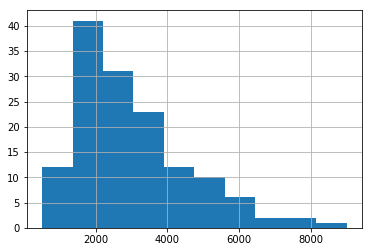

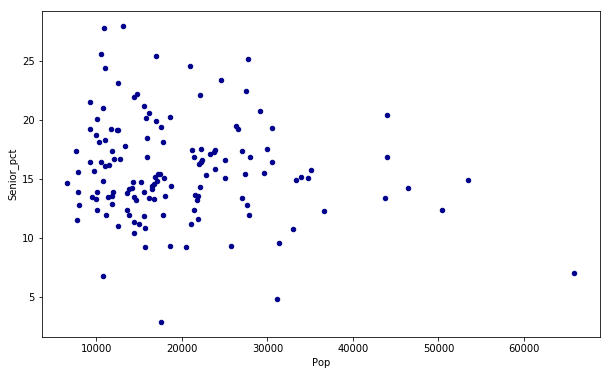

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df_result['Pop_65plus'].hist()
#  df_result['Senior_pct'].hist()
df_result.plot(kind='scatter', x='Pop', y='Senior_pct', figsize=(10, 6), color='darkblue')

In [14]:
import requests # library to handle requests
from pandas.io.json import json_normalize

CLIENT_ID = 'P0NBLAZKG1M2SJYL3WIL3K2K2LLXVRD0415ILJ3ZCK2BSORF' # your Foursquare ID
CLIENT_SECRET = 'ORBKHCMPJ244E5XSZ55OLRFDFE04SH4VKIM1T3KN4HHCGRRI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [15]:
# define a function to retrieve all the nearby venues around a lat/long point
def getNearbyVenues(names, latitudes, longitudes, radius=1000, limit = 100):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']   
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood_Latitude', 
                  'Neighbourhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [16]:
# call getNearbyVenues function

Toronto_venues = getNearbyVenues(names=df_result['Neighbourhood'],  
                                   latitudes=df_result['latitude'], 
                                   longitudes=df_result['longitude']  
                                  )
print(Toronto_venues.shape)

(6300, 7)


In [17]:
Toronto_venues.head()

Toronto_venues["Venue_Category"].value_counts()

#List unique values in the df['name'] column
Toronto_venues.Venue_Category.unique()

# 'Medical Center' 'Pharmacy','Doctor's Office'

array(['Grocery Store', 'Burger Joint', 'Coffee Shop', 'Pizza Place',
       'Sandwich Place', 'Pharmacy', 'Fried Chicken Joint', 'Beer Store',
       'Bus Line', 'Fast Food Restaurant', 'Gym Pool', 'Discount Store',
       'Japanese Restaurant', 'Café', 'Auto Garage', 'Hardware Store',
       'Park', 'Caribbean Restaurant', 'Convenience Store',
       'Residential Building (Apartment / Condo)', 'Ice Cream Shop',
       'Indian Restaurant', 'Bank', 'American Restaurant', 'Spa',
       'Supermarket', 'Dance Studio', 'ATM', 'Asian Restaurant',
       'Skating Rink', 'Bakery', 'Thai Restaurant',
       'Thrift / Vintage Store', 'Fish & Chips Shop', 'Golf Course',
       'Video Game Store', 'Breakfast Spot', 'Gym', 'Chinese Restaurant',
       'Restaurant', 'Gas Station', 'Storage Facility', 'Shopping Mall',
       'Mobile Phone Shop', 'Intersection', 'Racetrack', 'Liquor Store',
       'Athletics & Sports', 'Paintball Field', 'Sporting Goods Shop',
       'Diner', 'Train Station', 'Soccer

In [18]:
# Medical = Category.query('V_Category == ["Doctor's Office", "Pharmacy"]') 
Medical = Toronto_venues.loc[Toronto_venues['Venue_Category'] == "Pharmacy" ]
# Medical = Toronto_venues.loc[Toronto_venues['Venue_Category'] == "Doctor's Office" ] # only returns 1 record
# join this table to original neighborhood table 

Medical.shape # returns 115 records
Medical.head(10) 

Medical['Pharmacy'] = 1
Medical.drop_duplicates(subset ="Neighbourhood", keep = False, inplace = True) 
Medical = Medical.drop(['Venue','Venue_Latitude', 'Venue_Longitude', 'Venue_Category'], axis = 1)
                         
Medical.shape # returns 59 records
Medical.head() 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,Neighbourhood_Latitude,Neighbourhood_Longitude,Pharmacy
5,West Humber-Clairville,43.73419,-79.589062,1
20,Mount Olive-Silverstone-Jamestown,43.74750,-79.589059,1
42,Thistletown-Beaumond Heights,43.73867,-79.565062,1
79,Kingsview Village-The Westway,43.70055,-79.552302,1
91,Willowridge-Martingrove-Richview,43.68079,-79.570504,1


In [19]:
Final_data = df_result.set_index('Neighbourhood').join(Medical.set_index('Neighbourhood'))

Final_data['Pharmacy'].replace(np.nan, 0, inplace = True)
Final_data.drop(['Neighbourhood_Latitude', 'Neighbourhood_Longitude'], axis =1, inplace = True)
Final_data.head()
# Final_data.describe()

,latitude,longitude,Pop_65plus,Pop,Senior_pct,Pharmacy
Neighbourhood,,,,,,
West Humber-Clairville,43.73419,-79.589062,4980.0,33320.0,14.95,1.0
Mount Olive-Silverstone-Jamestown,43.74750,-79.589059,3560.0,32950.0,10.80,1.0
Thistletown-Beaumond Heights,43.73867,-79.565062,1880.0,10360.0,18.15,1.0
Rexdale-Kipling,43.72832,-79.581996,1730.0,10530.0,16.43,0.0
Elms-Old Rexdale,43.72235,-79.550414,1275.0,9460.0,13.48,0.0


In [20]:
Part1 = Final_data.query('Pharmacy == [1]')
Part1.describe()

Part2 = Final_data.query('Pharmacy == [0]')
Part2.describe()

,latitude,longitude,Pop_65plus,Pop,Senior_pct,Pharmacy
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,43.703756,-79.400383,2893.209877,19035.987654,15.624691,0.0
std,0.054473,0.099934,1576.362765,10105.086789,4.629853,0.0
min,43.590950,-79.581996,510.000000,6585.000000,2.910000,0.0
25%,43.660350,-79.471643,1740.000000,11780.000000,12.860000,0.0
50%,43.689440,-79.403557,2455.000000,16935.000000,15.120000,0.0
75%,43.740800,-79.319592,3685.000000,23235.000000,18.330000,0.0
max,43.820880,-79.167052,8990.000000,65920.000000,28.020000,0.0


In [21]:
Pivot_table = pd.pivot_table(
    Final_data, index=['Pharmacy'],  values=["Senior_pct", 'Pop_65plus', 'Pop'], 
    aggfunc=[np.average], fill_value=0) # or np.average / ‘count’


Pivot_table 

average                        
                   Pop   Pop_65plus Senior_pct
Pharmacy                                      
0.0       19035.987654  2893.209877  15.624691
1.0       20289.406780  3225.169492  16.050169

In [25]:
Tonronto_medical2 = Final_data.copy()

Tonronto_medical2.drop(['latitude', 'longitude'], axis = 1, inplace = True)
Tonronto_medical2.head()

Tonronto_medical3 = Tonronto_medical2.reset_index()
Tonronto_medical3.head()

Final_Data = pd.merge(left=Final_data, right=Tonronto_medical3, left_on='Neighbourhood', right_on='Neighbourhood') # join table based on a key column
Final_Data.drop(['Pop_65plus_x', 'Pop_x', 'Senior_pct_x', 'Pharmacy_x'], axis =1, inplace= True)
Final_Data.head()

Final_Data2 = Final_Data.rename(columns = {"Cluster Labels": "Cluster_Labels", 
                                           "Pop_65plus_y": "Pop_65plus",
                                          "Pop_y": "Pop",
                                          "Senior_pct_y":"Senior_pct",
                                          "Pharmacy_y":"Pharmacy"})
Final_Data2.columns 



Index(['Neighbourhood', 'latitude', 'longitude', 'Pop_65plus', 'Pop',
       'Senior_pct', 'Pharmacy'],
      dtype='object')

In [26]:
import statsmodels.api as sm
Y = Final_Data2['Pharmacy']
X = Final_Data2[['Pop','Pop_65plus', 'Senior_pct']]
#X = Final_Data2['Pop']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.673722
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.010   
Dependent Variable: Pharmacy         AIC:              194.6422
Date:               2020-03-14 19:06 BIC:              203.4672
No. Observations:   140              Log-Likelihood:   -94.321 
Df Model:           2                LL-Null:          -95.305 
Df Residuals:       137              LLR p-value:      0.37391 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Pop          -0.0000    0.0000  -1.3213  0.1864  -0.0001  0.0000
Pop_65plus    0.0004    0.0002   1.6110  0.1072  -0.0001  0.0008
Senior_pct   -0.0441  

In [27]:
!conda install -c conda-forge folium=0.5.0 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [37]:
latitude = 43.73419
longitude = -79.589062

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
map_Toronto 


In [35]:
Toronto = Final_Data2.copy()

from IPython.display import Image 
from IPython.core.display import HTML 
import matplotlib.cm as cm
import matplotlib.colors as colors

markers_colors = []
kclusters = 2

# set color scheme for the clusters

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


for lat, lon, poi, cluster in zip(Toronto['latitude'], Toronto['longitude'], Toronto['Neighbourhood'], Toronto['Pharmacy']):
    label = folium.Popup(str(poi) + ' Access ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup= label,
        color=rainbow[int(cluster) -1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Toronto)
       
map_Toronto

